In [2]:
import os
import json
import numpy as np
import cv2
import numpy as np
import matplotlib.pyplot as plt

## load the cfg

In [3]:
from utils import load_camera_params_from_cfg_file

calib_folder = "cfg/camera/calib_from_wheel_loader/"
# filename = calib_folder +'intrinsics_cam_SN_4029228_1024_768.cfg'
# filename = calib_folder +'intrinsics_cam_SN_4029206_1024_768.cfg'
filename = calib_folder + "intrinsics_cam_SN_4029216_1024_768.cfg"
# filename = calib_folder +'intrinsics_cam_SN_4029208_1024_768.cfg'

# calib_folder = 'cfg/camera/calib_from_tests/'
# filename = calib_folder +'2023_10_18_17_15_21_720x960_4149282_2023_10_13_corners_A5PRT0_ip_73_Single_Shot.cfg'
# filename = calib_folder +'2023_10_18_17_18_47_720x960_4149298_2023_10_13_corners_A5PRTG_ip_70_Single_Shot.cfg'

camera_matrix, dist_coeffs = load_camera_params_from_cfg_file(filename)
print("cam_values:", camera_matrix)
print("dist_values_vector:", dist_coeffs)

cam_values: [[532.6143, 0.0, 506.44476], [0.0, 533.81482, 399.28723], [0.0, 0.0, 1.0]]
dist_values_vector: [-0.1390056, 0.011930478, -0.016318453, 0.010491364]


## get the image

### extract one frame from distorted video 

In [4]:
# folder_path = '/home/chenxin/dataset/Pcaps_Birds_Eye/led_radlader_azubi_tag/'
# video_path = folder_path + 'camera_53260.mp4'

# # extract one frame from video
# cap = cv2.VideoCapture(video_path)
# frame_number = 100
# cap.set(cv2.CAP_PROP_POS_FRAMES, frame_number)
# success, frame = cap.read()
# cap.release()

# # save the frame
# cv2.imwrite('./images/frame.png', frame)

# load the frame
frame = cv2.imread("./images/frame.png")

### get one coco image

In [5]:
coco_root = "/data/coco/"
ann_file = "instances_train2017_person.json"

# load json
with open(os.path.join(coco_root, "annotations", ann_file), "r") as f:
    anns = json.load(f)

{'segmentation': [[453.0,
   292.1,
   457.0,
   253.1,
   439.0,
   245.1,
   438.0,
   215.1,
   439.0,
   198.1,
   420.0,
   223.1,
   414.0,
   233.1,
   401.0,
   227.1,
   400.0,
   226.1,
   398.0,
   229.1,
   391.0,
   231.1,
   387.0,
   213.1,
   399.0,
   203.1,
   404.0,
   200.1,
   413.0,
   194.1,
   418.0,
   186.1,
   408.0,
   181.1,
   415.0,
   154.1,
   418.0,
   142.1,
   419.0,
   127.1,
   422.0,
   125.1,
   419.0,
   120.1,
   412.0,
   122.1,
   407.0,
   112.1,
   402.0,
   105.1,
   389.0,
   113.1,
   390.0,
   105.1,
   395.0,
   100.1,
   395.0,
   97.1,
   398.0,
   83.1,
   407.0,
   72.1,
   417.0,
   71.1,
   424.0,
   72.1,
   428.0,
   73.1,
   436.0,
   80.1,
   441.0,
   90.1,
   446.0,
   96.1,
   456.0,
   101.1,
   472.0,
   110.1,
   480.0,
   113.1,
   493.0,
   123.1,
   499.0,
   136.1,
   504.0,
   147.1,
   509.0,
   167.1,
   515.0,
   182.1,
   531.0,
   205.1,
   532.0,
   218.1,
   525.0,
   229.1,
   514.0,
   246.1,
   499.0,
   

In [6]:
i = np.random.choice(len(anns["images"]))
img_path = anns["images"][i]["file_name"]
img_path = os.path.join(coco_root, "train2017", img_path)
img = cv2.imread(img_path)

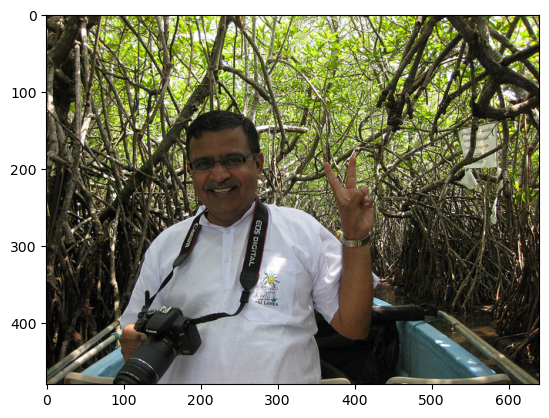

In [7]:
# show the img
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

## undistortion

In [8]:
def undistort_image(image, camera_matrix, dist_coeffs):

    # Compute the optimal new camera matrix
    h, w = image.shape[:2]
    new_camera_matrix, roi = cv2.getOptimalNewCameraMatrix(
        camera_matrix, dist_coeffs, (w, h), 1, (w, h)
    )

    # Undistort the image
    undistorted_image = cv2.undistort(
        image, camera_matrix, dist_coeffs, None, new_camera_matrix
    )

    # Crop the image if you want to remove the black edges (optional)
    # x, y, w, h = roi
    # undistorted_image = undistorted_image[y:y+h, x:x+w]

    return undistorted_image


def undistort_image_fisheye(image, camera_matrix, dist_coeffs):

    # Compute the optimal new camera matrix
    h, w = image.shape[:2]
    new_camera_matrix = cv2.fisheye.estimateNewCameraMatrixForUndistortRectify(
        camera_matrix, dist_coeffs, (w, h), np.eye(3), balance=1
    )

    # Undistort the image
    undistorted_image = cv2.fisheye.undistortImage(
        image, camera_matrix, dist_coeffs, Knew=new_camera_matrix
    )

    return undistorted_image

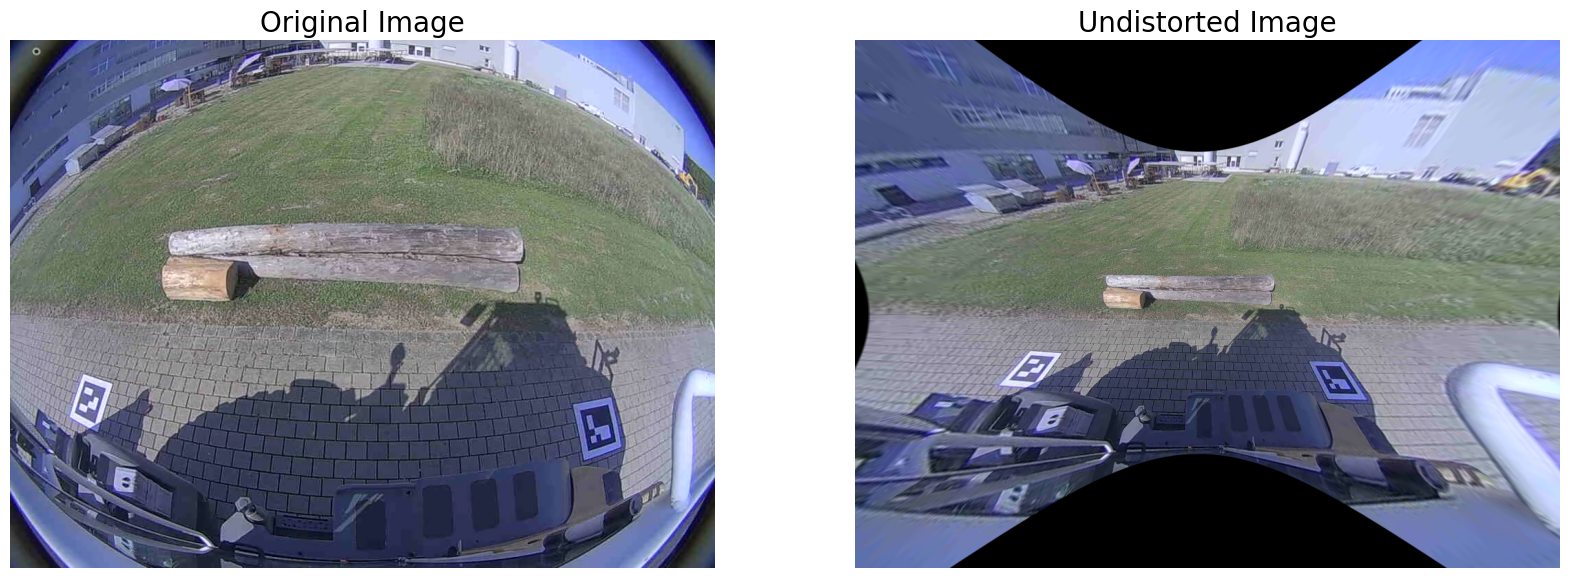

In [9]:
K = np.array(camera_matrix)
D = np.array(dist_coeffs)

undistorted_image = undistort_image_fisheye(frame, K, D)

# show the original image and the undistorted image
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

ax1.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
ax1.set_title("Original Image", fontsize=20)
ax2.imshow(cv2.cvtColor(undistorted_image, cv2.COLOR_BGR2RGB))
ax2.set_title("Undistorted Image", fontsize=20)
ax1.axis("off")
ax2.axis("off")
plt.show()

## distortion

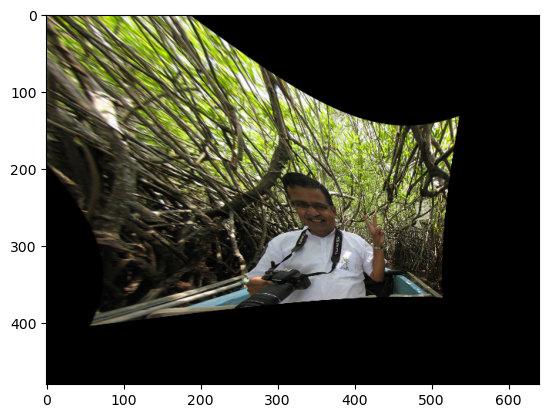

In [11]:
K = np.array(camera_matrix)
D = np.array(dist_coeffs)

h, w = img.shape[:2]

new_K = cv2.fisheye.estimateNewCameraMatrixForUndistortRectify(
    K, D, (w, h), np.eye(3), balance=1
)

mapx, mapy = cv2.fisheye.initUndistortRectifyMap(
    K, D, np.eye(3), new_K, (w, h), cv2.CV_16SC2
)
distorted_image = cv2.remap(
    img, mapx, mapy, interpolation=cv2.INTER_LINEAR, borderMode=cv2.BORDER_CONSTANT
)

plt.imshow(cv2.cvtColor(distorted_image, cv2.COLOR_BGR2RGB))

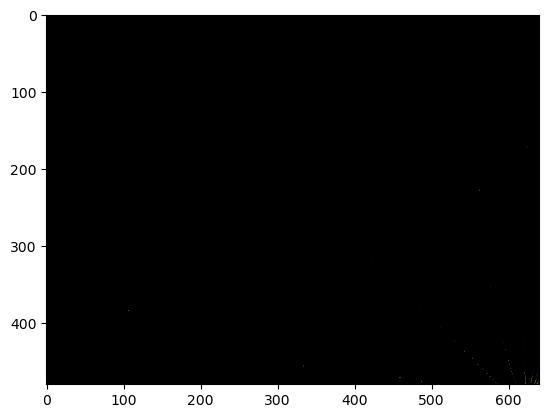

In [69]:
h, w = img.shape[:2]
# Create normalized image coordinates
x, y = np.meshgrid(np.arange(w), np.arange(h))
# Convert to homogeneous coordinates
points = np.stack((x, y), axis=-1)
distorted_points = cv2.fisheye.distortPoints(points.astype(np.float32), K, D)
distorted_points = distorted_points.reshape(-1, 2)

# Create empty image with the same size as original
distorted_img = np.zeros_like(img)

# Fill the distorted image by mapping each distorted point to its corresponding pixel
for i in range(len(distorted_points)):
    x, y = distorted_points[i]
    if 0 <= x < img.shape[1] and 0 <= y < img.shape[0]:
        distorted_img[int(y), int(x)] = img[int(y), int(x)]
plt.imshow(cv2.cvtColor(distorted_img, cv2.COLOR_BGR2RGB))